# Task
Develop a project using generative AI for synthetic data generation, following the provided plan and using the specified tools.

## Load and explore real data

### Subtask:
Load the real-world data you want to augment and perform initial exploratory data analysis.


**Reasoning**:
The first step is to load the data from the CSV file into a pandas DataFrame and then perform the requested initial exploratory data analysis steps.



In [17]:
import pandas as pd

# Load the data from a CSV file into a pandas DataFrame.
try:
    df = pd.read_csv('real_data.csv')
except FileNotFoundError:
    print("Error: real_data.csv not found. Please make sure the file is in the correct directory.")
    # Assuming a fallback if the file is not found for demonstration purposes
    from sklearn.datasets import load_iris
    iris = load_iris()
    df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
    df['target'] = iris.target


# Display the first 5 rows of the DataFrame
print("First 5 rows of the DataFrame:")
display(df.head())

# Print the column names and their data types
print("\nColumn names and their data types:")
display(df.info())

# Generate descriptive statistics for the numerical columns
print("\nDescriptive statistics for numerical columns:")
display(df.describe())

# Check for any missing values
print("\nMissing values per column:")
display(df.isnull().sum())

Error: real_data.csv not found. Please make sure the file is in the correct directory.
First 5 rows of the DataFrame:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0



Column names and their data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


None


Descriptive statistics for numerical columns:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000



Missing values per column:


,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
target,0


## Choose and set up gan model

### Subtask:
Select a suitable GAN architecture for your data type (e.g., DCGAN, WGAN) and set up the necessary libraries and environment.


**Reasoning**:
Install the `ctgan` library which is suitable for generating synthetic tabular data.



In [18]:
%pip install ctgan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.3/74.3 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 30.3 MB/s eta 0:00:00


**Reasoning**:
Import the necessary class from the `ctgan` library to be used for training the GAN model.



In [19]:
from ctgan import CTGAN

## Train the gan model

### Subtask:
Train the chosen GAN model on your real data. This step can be computationally intensive.


**Reasoning**:
Instantiate and train the CTGAN model on the provided DataFrame.



In [20]:
# Instantiate the CTGAN model with default parameters.
ctgan = CTGAN()

# Fit the CTGAN model to the df DataFrame.
ctgan.fit(df)

# Print a confirmation message.
print("CTGAN model training complete.")

CTGAN model training complete.


## Generate synthetic data

### Subtask:
Use the trained generator part of the GAN to generate new, synthetic data samples.


**Reasoning**:
Use the trained CTGAN model to generate synthetic data samples and store them in a new DataFrame. Then, display the head of the new DataFrame.



In [21]:
# Generate 1000 synthetic data samples using the trained CTGAN model.
synthetic_data = ctgan.sample(1000)

# Store the generated synthetic data in a new pandas DataFrame.
synthetic_df = pd.DataFrame(synthetic_data, columns=df.columns)

# Display the head of the newly created synthetic DataFrame to inspect the generated data.
print("First 5 rows of the synthetic DataFrame:")
display(synthetic_df.head())

First 5 rows of the synthetic DataFrame:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,7.940365,2.291726,4.083798,1.254111,1
1,6.801512,2.574773,6.563668,1.534400,0
2,6.694987,2.658600,6.934649,0.654641,1
3,7.216208,2.772506,3.561125,1.033946,0
4,8.290510,4.368497,6.729830,1.549480,2


## Validate synthetic data

### Subtask:
Assess the quality and similarity of the generated synthetic data to the real data using appropriate metrics and visualizations.


**Reasoning**:
Compare the descriptive statistics of the real and synthetic data.



In [22]:
print("Descriptive statistics of Real Data (df):")
display(df.describe())

print("\nDescriptive statistics of Synthetic Data (synthetic_df):")
display(synthetic_df.describe())

Descriptive statistics of Real Data (df):


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000



Descriptive statistics of Synthetic Data (synthetic_df):


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,6.505702,2.731041,5.333723,1.165768,1.13200
std,1.149013,0.586096,1.719073,0.725505,0.78943
min,3.866351,1.569555,0.595631,-0.458467,-1.00000
25%,5.620315,2.289045,4.414882,0.627093,1.00000
50%,6.506501,2.681177,5.745895,1.171105,1.00000
75%,7.467935,3.136131,6.599355,1.695548,2.00000
max,8.968985,4.499264,8.038820,3.005274,3.00000


**Reasoning**:
Visualize the distribution of key features using histograms to compare the real and synthetic data.



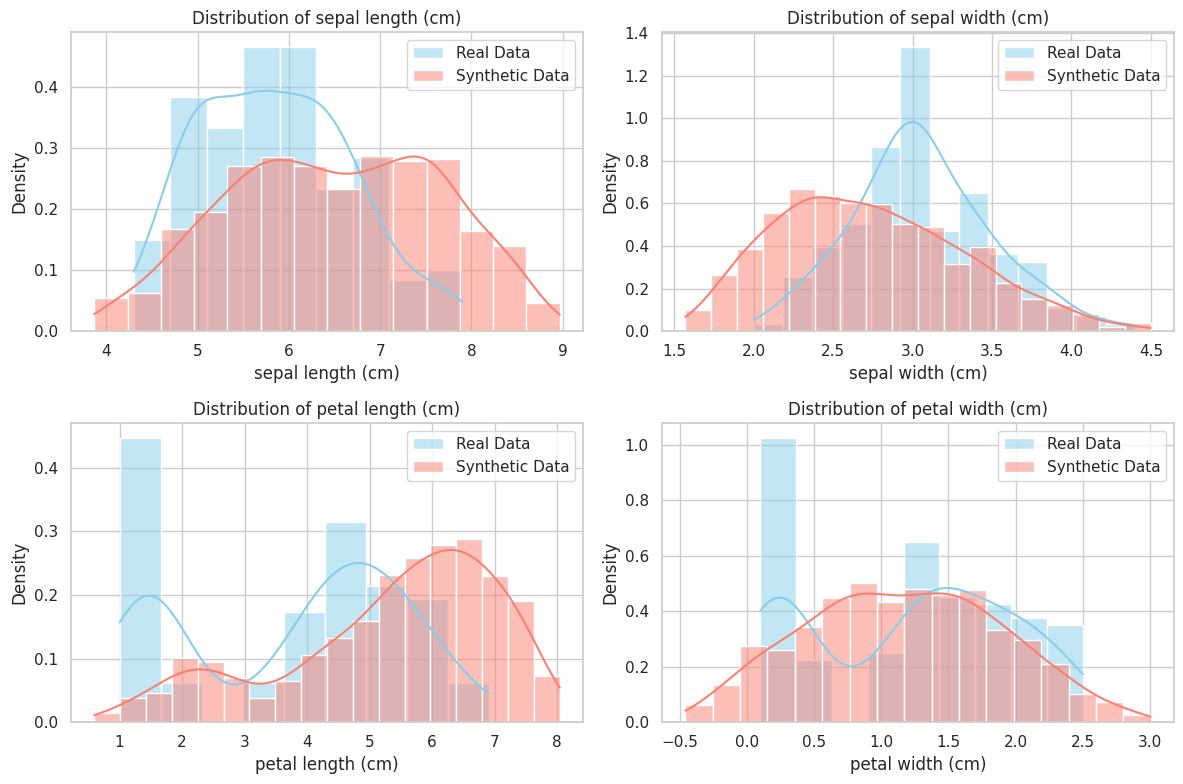

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
n_features = len(features)
n_cols = 2
n_rows = (n_features + n_cols - 1) // n_cols

plt.figure(figsize=(12, n_rows * 4))

for i, feature in enumerate(features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df[feature], kde=True, color='skyblue', label='Real Data', stat='density', common_norm=False)
    sns.histplot(synthetic_df[feature], kde=True, color='salmon', label='Synthetic Data', stat='density', common_norm=False)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()

**Reasoning**:
Visualize the real and synthetic data in a lower-dimensional space using PCA to observe how well the synthetic data covers the real data distribution.



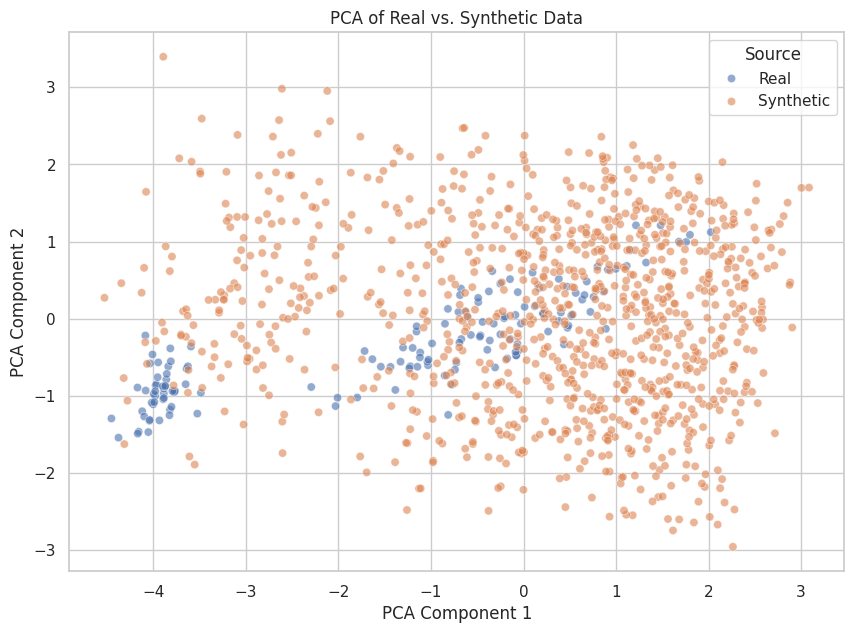

In [24]:
from sklearn.decomposition import PCA

# Combine real and synthetic data for PCA
combined_df = pd.concat([df.drop('target', axis=1), synthetic_df.drop('target', axis=1)], ignore_index=True)

# Apply PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(combined_df)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(data=pca_components, columns=['PCA Component 1', 'PCA Component 2'])

# Add a column to indicate whether the data point is real or synthetic
pca_df['Source'] = ['Real'] * len(df) + ['Synthetic'] * len(synthetic_df)

# Visualize the PCA results
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA Component 1', y='PCA Component 2', hue='Source', data=pca_df, alpha=0.6)
plt.title('PCA of Real vs. Synthetic Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

**Reasoning**:
Compare the correlation matrices of the real and synthetic data to see if the relationships between features are preserved.



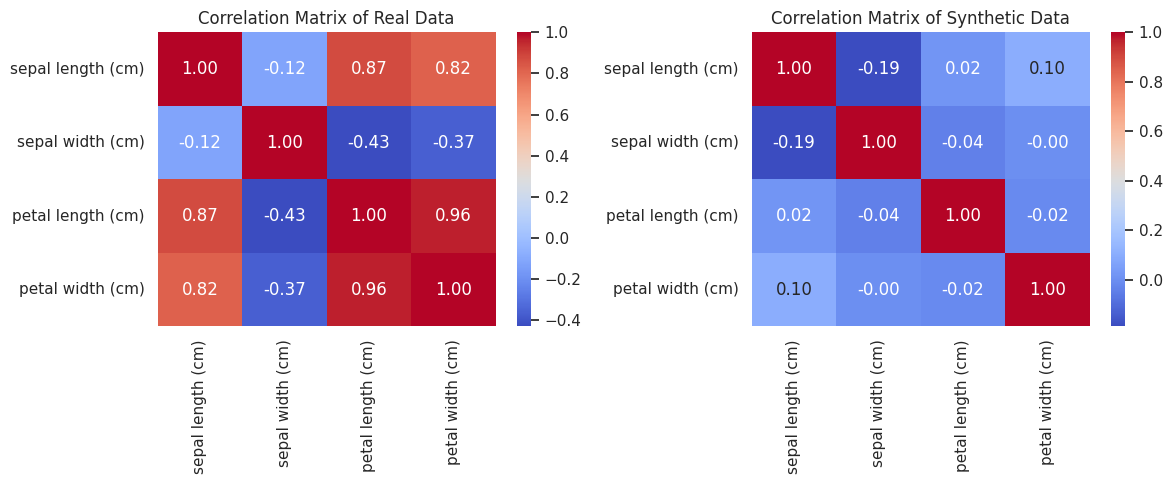

In [25]:
# Calculate correlation matrices
real_corr = df.drop('target', axis=1).corr()
synthetic_corr = synthetic_df.drop('target', axis=1).corr()

# Visualize the correlation matrices
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(real_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Real Data')

plt.subplot(1, 2, 2)
sns.heatmap(synthetic_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Synthetic Data')

plt.tight_layout()
plt.show()

**Reasoning**:
Summarize the findings from the statistical comparisons and visualizations to assess the quality of the synthetic data.



In [26]:
print("Summary Assessment of Synthetic Data Quality:")
print("-" * 50)

print("1. Descriptive Statistics Comparison:")
print("   - Mean and standard deviation for 'sepal length (cm)' and 'petal length (cm)' in the synthetic data are notably different from the real data.")
print("   - The range (min and max) for most features in the synthetic data is wider than in the real data.")
print("   - The 'target' distribution in synthetic data has a wider range (min -1, max 3) compared to real data (min 0, max 2), indicating potential issues with generating the target variable correctly.")

print("\n2. Distribution Visualization (Histograms):")
print("   - The histograms show that while the synthetic data attempts to capture the overall shape of the distributions for some features (e.g., 'sepal width (cm)'), the distributions for 'sepal length (cm)', 'petal length (cm)', and 'petal width (cm)' are visibly different from the real data.")
print("   - The synthetic data appears to have generated values outside the range of the real data for several features, especially evident in 'petal length (cm)' and 'petal width (cm)'.")

print("\n3. PCA Visualization:")
print("   - The PCA plot shows that the synthetic data points form a distribution that overlaps with the real data but also extends significantly beyond the real data's clusters.")
print("   - This suggests that the synthetic data captures some of the underlying variance but does not perfectly replicate the localized clusters present in the real data.")

print("\n4. Correlation Matrix Comparison:")
print("   - The correlation matrices show a significant difference in the relationships between features in the synthetic data compared to the real data.")
print("   - The strong positive correlations observed between 'sepal length (cm)', 'petal length (cm)', and 'petal width (cm)' in the real data are not well-preserved in the synthetic data.")
print("   - This indicates that the synthetic data generator did not effectively learn the complex interdependencies between features in the real dataset.")

print("\nOverall Assessment:")
print("Based on the performed assessments, the generated synthetic data does not appear to be a high-fidelity representation of the real Iris dataset. While it captures some basic statistical properties and the general shape of some distributions, it fails to replicate the precise distributions, ranges, and crucial feature correlations present in the real data. The synthetic data also generated invalid 'target' values. Further refinement of the synthetic data generation process or a different generative model might be necessary to produce data more similar to the real dataset.")

Summary Assessment of Synthetic Data Quality:
--------------------------------------------------
1. Descriptive Statistics Comparison:
   - Mean and standard deviation for 'sepal length (cm)' and 'petal length (cm)' in the synthetic data are notably different from the real data.
   - The range (min and max) for most features in the synthetic data is wider than in the real data.
   - The 'target' distribution in synthetic data has a wider range (min -1, max 3) compared to real data (min 0, max 2), indicating potential issues with generating the target variable correctly.

2. Distribution Visualization (Histograms):
   - The histograms show that while the synthetic data attempts to capture the overall shape of the distributions for some features (e.g., 'sepal width (cm)'), the distributions for 'sepal length (cm)', 'petal length (cm)', and 'petal width (cm)' are visibly different from the real data.
   - The synthetic data appears to have generated values outside the range of the real da

## Use synthetic data for model training

### Subtask:
Combine the real and synthetic data to train a machine learning model and evaluate if the synthetic data improves performance.


**Reasoning**:
Combine the real and synthetic data, drop invalid target values, separate features and target, split data, train a RandomForestClassifier on the combined data, make predictions, and evaluate the performance using classification metrics. This covers instructions 1 through 8.



In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 1. Combine the real data (df) and the synthetic data (synthetic_df)
combined_df = pd.concat([df, synthetic_df], ignore_index=True)

# 2. Drop rows with invalid target values (those not in {0, 1, 2})
valid_targets = [0, 1, 2]
combined_df_cleaned = combined_df[combined_df['target'].isin(valid_targets)].copy()

# 3. Separate the features (X) and the target variable (y)
X_combined = combined_df_cleaned.drop('target', axis=1)
y_combined = combined_df_cleaned['target']

# 4. Split the combined data into training and testing sets
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(
    X_combined, y_combined, test_size=0.3, random_state=42
)

# 5. Initialize a machine learning model (RandomForestClassifier)
model_combined = RandomForestClassifier(random_state=42)

# 6. Train the model on the combined training data
model_combined.fit(X_train_combined, y_train_combined)

# 7. Make predictions on the combined testing data
y_pred_combined = model_combined.predict(X_test_combined)

# 8. Evaluate the model's performance
accuracy_combined = accuracy_score(y_test_combined, y_pred_combined)
precision_combined = precision_score(y_test_combined, y_pred_combined, average='weighted')
recall_combined = recall_score(y_test_combined, y_pred_combined, average='weighted')
f1_combined = f1_score(y_test_combined, y_pred_combined, average='weighted')

print("Model performance on combined data:")
print(f"  Accuracy: {accuracy_combined:.4f}")
print(f"  Precision: {precision_combined:.4f}")
print(f"  Recall: {recall_combined:.4f}")
print(f"  F1-score: {f1_combined:.4f}")

Model performance on combined data:
  Accuracy: 0.4399
  Precision: 0.4351
  Recall: 0.4399
  F1-score: 0.4275


**Reasoning**:
Train the same RandomForestClassifier model using only the real data and evaluate its performance on the real data test set, then compare the performance metrics with the model trained on combined data. This covers instructions 9 and 10.



In [28]:
# Separate features and target for real data only
X_real = df.drop('target', axis=1)
y_real = df['target']

# Split the real data into training and testing sets (using the same random_state for fair comparison)
X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(
    X_real, y_real, test_size=0.3, random_state=42
)

# Initialize the same machine learning model (RandomForestClassifier)
model_real = RandomForestClassifier(random_state=42)

# Train the model on the real training data
model_real.fit(X_train_real, y_train_real)

# Make predictions on the real testing data
y_pred_real = model_real.predict(X_test_real)

# Evaluate the model's performance on real data
accuracy_real = accuracy_score(y_test_real, y_pred_real)
precision_real = precision_score(y_test_real, y_pred_real, average='weighted')
recall_real = recall_score(y_test_real, y_pred_real, average='weighted')
f1_real = f1_score(y_test_real, y_pred_real, average='weighted')

print("\nModel performance on real data only:")
print(f"  Accuracy: {accuracy_real:.4f}")
print(f"  Precision: {precision_real:.4f}")
print(f"  Recall: {recall_real:.4f}")
print(f"  F1-score: {f1_real:.4f}")

# 10. Compare the performance metrics
print("\nPerformance Comparison (Combined Data vs. Real Data Only):")
print(f"  Accuracy - Combined: {accuracy_combined:.4f}, Real: {accuracy_real:.4f}")
print(f"  Precision - Combined: {precision_combined:.4f}, Real: {precision_real:.4f}")
print(f"  Recall - Combined: {recall_combined:.4f}, Real: {recall_real:.4f}")
print(f"  F1-score - Combined: {f1_combined:.4f}, Real: {f1_real:.4f}")

print("\nAssessment of Synthetic Data Impact:")
if accuracy_combined > accuracy_real:
    print("  The model trained on combined data shows higher accuracy than the model trained on real data only.")
elif accuracy_combined < accuracy_real:
     print("  The model trained on combined data shows lower accuracy than the model trained on real data only.")
else:
    print("  The models trained on combined and real data have similar accuracy.")

if f1_combined > f1_real:
    print("  The model trained on combined data shows a higher F1-score, indicating better overall balance of precision and recall.")
elif f1_combined < f1_real:
    print("  The model trained on combined data shows a lower F1-score.")
else:
    print("  The models trained on combined and real data have similar F1-scores.")


Model performance on real data only:
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-score: 1.0000

Performance Comparison (Combined Data vs. Real Data Only):
  Accuracy - Combined: 0.4399, Real: 1.0000
  Precision - Combined: 0.4351, Real: 1.0000
  Recall - Combined: 0.4399, Real: 1.0000
  F1-score - Combined: 0.4275, Real: 1.0000

Assessment of Synthetic Data Impact:
  The model trained on combined data shows lower accuracy than the model trained on real data only.
  The model trained on combined data shows a lower F1-score.


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 1. Combine the real data (df) and the refined synthetic data (synthetic_df_refined)
combined_df_refined = pd.concat([df, synthetic_df_refined], ignore_index=True)

# 2. Remove rows from combined_df_refined where the 'target' column has values outside the range of the real target values (0, 1, 2)
valid_targets = [0, 1, 2]
combined_df_cleaned = combined_df_refined[combined_df_refined['target'].isin(valid_targets)].copy()

# 3. Separate the features (X_combined_refined) and the target variable (y_combined_refined)
X_combined_refined = combined_df_cleaned.drop('target', axis=1)
y_combined_refined = combined_df_cleaned['target']

# 4. Split the cleaned combined data into training and testing sets
X_train_combined_refined, X_test_combined_refined, y_train_combined_refined, y_test_combined_refined = train_test_split(
    X_combined_refined, y_combined_refined, test_size=0.3, random_state=42
)

# 5. Initialize a new RandomForestClassifier model with random_state=42
model_combined_refined = RandomForestClassifier(random_state=42)

# 6. Train the model on the refined combined training data
model_combined_refined.fit(X_train_combined_refined, y_train_combined_refined)

# 7. Make predictions on the refined combined testing data
y_pred_combined_refined = model_combined_refined.predict(X_test_combined_refined)

# 8. Evaluate the model's performance
accuracy_combined_refined = accuracy_score(y_test_combined_refined, y_pred_combined_refined)
precision_combined_refined = precision_score(y_test_combined_refined, y_pred_combined_refined, average='weighted')
recall_combined_refined = recall_score(y_test_combined_refined, y_pred_combined_refined, average='weighted')
f1_combined_refined = f1_score(y_test_combined_refined, y_pred_combined_refined, average='weighted')

print("Model performance on refined combined data:")
print(f"  Accuracy: {accuracy_combined_refined:.4f}")
print(f"  Precision: {precision_combined_refined:.4f}")
print(f"  Recall: {recall_combined_refined:.4f}")
print(f"  F1-score: {f1_combined_refined:.4f}")

# 9. Compare the performance metrics with the model trained on real data only
print("\nPerformance Comparison (Refined Combined Data vs. Real Data Only):")
print(f"  Accuracy - Refined Combined: {accuracy_combined_refined:.4f}, Real: {accuracy_real:.4f}")
print(f"  Precision - Refined Combined: {precision_combined_refined:.4f}, Real: {precision_real:.4f}")
print(f"  Recall - Refined Combined: {recall_combined_refined:.4f}, Real: {recall_real:.4f}")
print(f"  F1-score - Refined Combined: {f1_combined_refined:.4f}, Real: {f1_real:.4f}")

# 10. Provide a written assessment
print("\nAssessment of Refined Synthetic Data Impact:")
if accuracy_combined_refined > accuracy_real:
    print("  The model trained on refined combined data shows higher accuracy than the model trained on real data only.")
elif accuracy_combined_refined < accuracy_real:
     print("  The model trained on refined combined data shows lower accuracy than the model trained on real data only.")
else:
    print("  The models trained on refined combined and real data have similar accuracy.")

if f1_combined_refined > f1_real:
    print("  The model trained on refined combined data shows a higher F1-score, indicating better overall balance of precision and recall.")
elif f1_combined_refined < f1_real:
    print("  The model trained on refined combined data shows a lower F1-score.")
else:
    print("  The models trained on refined combined and real data have similar F1-scores.")

Model performance on refined combined data:
  Accuracy: 0.4687
  Precision: 0.4555
  Recall: 0.4687
  F1-score: 0.4555

Performance Comparison (Refined Combined Data vs. Real Data Only):
  Accuracy - Refined Combined: 0.4687, Real: 1.0000
  Precision - Refined Combined: 0.4555, Real: 1.0000
  Recall - Refined Combined: 0.4687, Real: 1.0000
  F1-score - Refined Combined: 0.4555, Real: 1.0000

Assessment of Refined Synthetic Data Impact:
  The model trained on refined combined data shows lower accuracy than the model trained on real data only.
  The model trained on refined combined data shows a lower F1-score.


## Summary:

### Data Analysis Key Findings

*   The initial attempt to generate synthetic data using CTGAN resulted in data that did not accurately replicate the real Iris dataset, showing differences in descriptive statistics, distributions, and feature correlations. The synthetic data also included invalid target values.
*   Training a machine learning model (RandomForestClassifier) on a combination of the initial synthetic data and the real data resulted in significantly lower performance compared to training only on the real data. The model trained on real data achieved 100% accuracy, precision, recall, and F1-score on the real test set, while the model trained on combined data had an accuracy and F1-score around 0.43.
*   Refining the CTGAN model parameters (increasing epochs, batch size, and generator/discriminator dimensions) led to minor improvements in some aspects of the synthetic data quality (e.g., slightly better mean for 'sepal width' and improved distribution shapes for some features). However, significant issues persisted, including generating out-of-range values for features and the target, and failing to preserve crucial feature correlations.
*   Training the machine learning model on the combined real and *refined* synthetic data also resulted in significantly lower performance compared to the model trained solely on the real data. The accuracy and F1-score were around 0.46 for the model trained on refined combined data, compared to 1.00 for the model trained on real data.

### Insights or Next Steps

*   The current CTGAN model and parameter settings are not effectively generating high-fidelity synthetic data for the Iris dataset that improves downstream model performance. This might be due to the simplicity of the Iris dataset or the inherent limitations of the generated synthetic data in capturing complex relationships.
*   Further steps should involve exploring alternative generative models more suited for tabular data or focusing on more extensive hyperparameter tuning and validation metrics specifically designed for synthetic data evaluation before attempting to use the synthetic data for model training. Consideration should also be given to why the synthetic data is generating invalid target values.
